In [2]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from PyQt5.QtWidgets import QApplication, QWidget
from PyQt5 import uic

class EqCalc(QWidget):
    def __init__(self, parent=None):
        # Инициализация родительского класса
        super(QWidget, self).__init__(parent)

        # Инициализация коэффициентов уравнения
        self.A = self.B = self.C = None

        # Запуск пользовательского интерфейса
        self.setupUi()

    def setupUi(self):
        # Загрузка интерфейса из .ui файла, созданного в Qt Designer
        uic.loadUi("ui_eqcal.ui", self)

        # По умолчанию кнопка "График" выключена до расчёта корней
        self.pushButtonPlot.setDisabled(True)

        # Связь кнопок с функциями
        self.pushButtonCount.clicked.connect(self.countRoots)  # "Рассчитать"
        self.pushButtonPlot.clicked.connect(self.plotMe)       # "График"
        self.pushButtonExit.clicked.connect(QApplication.instance().quit)  # "Закрыть"

    def countRoots(self):
        # Получение коэффициентов из полей и проверка на корректность ввода
        try:
            self.A = float(self.lineEditA.text())
            self.B = float(self.lineEditB.text())
            self.C = float(self.lineEditC.text())
        except ValueError:
            self.labelGreeting.setText("Ошибка ввода!")
            return

        # Вычисление дискриминанта
        D = self.B ** 2 - 4 * self.A * self.C
        self.labelD.setText(str(round(D, 2)))  # Отображаем дискриминант
        self.pushButtonPlot.setDisabled(False)  # Включаем кнопку графика

        # Отображение корней в зависимости от дискриминанта
        if D < 0:
            self.labelRoot1.setText("Нет корней")
            self.labelRoot2.setText("")
        elif D == 0:
            x = -self.B / (2 * self.A)
            self.labelRoot1.setText(f"{x:.2f}")
            self.labelRoot2.setText("-")
        else:
            x1 = (-self.B - math.sqrt(D)) / (2 * self.A)
            x2 = (-self.B + math.sqrt(D)) / (2 * self.A)
            self.labelRoot1.setText(f"{x1:.2f}")
            self.labelRoot2.setText(f"{x2:.2f}")

        # Отображение текстового представления уравнения
        self.labelGreeting.setText(f"{self.A}x² + {self.B}x + {self.C}")

    def plotMe(self):
        # Строим значения x и соответствующие y для графика
        x = np.linspace(-10, 10, 400)
        y = self.A * x ** 2 + self.B * x + self.C
        plt.plot(x, y, label="Парабола")

        # Если есть корни — добавляем их на график красными точками
        D = self.B ** 2 - 4 * self.A * self.C
        if D >= 0:
            x1 = (-self.B - math.sqrt(D)) / (2 * self.A)
            plt.plot(x1, 0, 'ro', label=f"Корень: {x1:.2f}")
            if D > 0:
                x2 = (-self.B + math.sqrt(D)) / (2 * self.A)
                plt.plot(x2, 0, 'ro', label=f"Корень: {x2:.2f}")

        # Добавляем оси, сетку, легенду
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title("График квадратного уравнения")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()

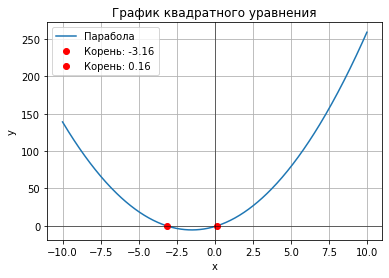

SystemExit: 0

/Users/ox/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
app = QApplication(sys.argv)  # Создаём приложение
window = EqCalc()             # Создаём окно
window.show()                 # Показываем окно
sys.exit(app.exec_())         # Запускаем цикл обработки событий